## An Open Economy Macro-economic Model:
- product equals aggregate demand, $Y = C + I +G +NX$; 
- consumption function, $C = \bar C + c(Y−T)$; 
- investment function, $I = \bar I − br$; 
- net exports function, $NX = \bar{NX} − j(Y−Y_f)+ne\bar P_f/\bar P$; 
- public spending function, $G = \bar G$; 
- income taxes function, $T = \bar T$; 
- monetary equilibrium, $M/P = kY − hr$; 
- money supply function, $M = \bar M$;
- current account equilibrium, $NX = -NX_f$;
- perfect capital mobility (or small open economy), $r =r_f$.

#### Endogenous variables: 
product, $Y$ and $Y_f$; consumption, $C$ and $C_f$; investment, $I$ and $I_f$; net exports, $NX$ and $NX_f$; interest rate, $r$ and $r_f$; exchange rate, $e$.

#### Exogenous variables: 
government/public spending, $\bar G$ and $\bar G_f$; independent/autonomous consumption, $\bar C$ and $\bar C_f$; independent/autonomous investment, $\bar I$ and $\bar I_f$; income taxes, $\bar T$ and $\bar T_f$; money supply, $\bar M$ and $\bar M_f$; price level (fixed), $\bar P$ and $\bar P_f$; independent/autonomous net exports, $\bar{NX}$.

#### Parameters:
- $0 < c < 1$ and $0 < c_f < 1$ are the marginal propensities to consume; 
- $b > 0$ and $b_f > 0$ are the interest sensitivities of investment; 
- $k > 0$ and $k_f > 0$ are the output sensitivities of the demand for money; 
- $h > 0$ and $h_f > 0$ are the interest sensitivities of the demand for money;
- $j > 0$ is the output sensitivity of net exports;
- $n > 0$ is the Real exchange rate sensitivity of net exports.

## IS−LM model 

### Two Open Economies in the short−medium run

In [2]:
import numpy as np
from sympy import *
import pprint
import scipy
import scipy.linalg   # SciPy Linear Algebra Library
import matplotlib.pyplot as plt
init_printing(use_latex=True)
Y, C, I, NX, r, e = symbols('Y C I NX r e')
Yf, Cf, If, NXf, rf = symbols('Yf Cf If NXf rf')
# Home parameters 
c = 0.63 #marginal propensity to consume 
b = 1500 #sensitivity of the investment to the interest rate 
k = 0.6  #sensitivity of the money demand to income 
h = 2700 #sensitivity of the money demand to the interest rate
j = 0.1  #sensitivity of the net exports to income 
n = 10  #sensitivity of the net exports to the real exchange rate 
# Foreign parameters 
cf = 0.63 #marginal propensity to consume 
bf = 1500 #sensitivity of the investment to the interest rate 
kf = 0.6  #sensitivity of the money demand to income 
hf = 2700 #sensitivity of the money demand to the interest rate
# Home policy and exogenous variables 
C_bar = 55 #autonomous consumption 
I_bar = 47 #autonomous investment 
G_bar = 150 #government spending 
T_bar = 150 #taxes
M_bar = 210 #money supply 
P_bar = 1 #price level ( fixed in the short−run )
NX_bar = -10 #autonomous net exports 
# Foreign policy and exogenous variables 
Cf_bar = 55 #autonomous consumption 
If_bar = 47 #autonomous investment 
Gf_bar = 150 #government spending 
Tf_bar = 150 #taxes
Mf_bar = 210 #money supply 
Pf_bar = 1 #price level ( fixed in the short−run )
# Home endogenous variables: Y (product), C (consumption), I (investment), NX (net exports), r (interest rate)
# Foreign endogenous variables: Yf (product), Cf (consumption), If (investment), NXf (net exports), rf (interest rate)
# e (nominal exchange rate)

# Matrix representation of the model: Ax=d 
# A, coefficient matrix for [Y, C, I, NX, r, Yf, Cf, If, NXf, rf, e]
A = np.matrix([
    [1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0], # Y=C+I+G+NX
    [-c, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], # C=C_bar+c*(Y−T) 
    [0, 0, 1, 0, b, 0, 0, 0, 0, 0, 0], # I=I_bar−b*r 
    [k, 0, 0, 0, -h, 0, 0, 0, 0, 0, 0], # M_bar/P_bar=k*Y−h*r               
    [0, 0, 0, 0, 0, 1, -1, -1, -1, 0, 0], # Yf=Cf+If+Gf+NXf
    [0, 0, 0, 0, 0, -cf, 1, 0, 0, 0, 0], # Cf=Cf_bar+cf*(Yf−Tf)
    [0, 0, 0, 0, 0, 0, 0, 1, 0, bf, 0], # If=If_bar−bf*rf          
    [0, 0, 0, 0, 0, kf, 0, 0, 0, -hf, 0], # Mf_bar/Pf_bar=kf*Yf−hf*rf                              
    [j, 0, 0, 1, 0, -j, 0, 0, 0, 0, -n*Pf_bar/P_bar], # NX=NX_bar−j*(Y-Yf)+n*e*Pf_bar/P_bar              
    [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], # NX=-NXf_bar
    [0, 0, 0, 0, 1, 0, 0, 0, 0, -1, 0] ]) # r=rf            
# x = [Y, C, I, NX, r, Yf, Cf, If, NXf, rf, e] , vector of the endogenous variables 
x = np.array( [Y, C, I, NX, r, Yf, Cf, If, NXf, rf, e] )
# d, vector of the exogenous variables 
d = np.array([G_bar,C_bar-c*T_bar,I_bar,M_bar/P_bar,Gf_bar,Cf_bar-cf*Tf_bar,If_bar,Mf_bar/Pf_bar, NX_bar, 0, 0] )
#Compute the solution
x=np.linalg.solve(A,d)
print(" IS-LM model: open economy \
      \n-----------------------------------------------------------\
      \nExogenous variables: \nG = Gf = 150; T = Tf = 150; M = Mf = 210; P = Pf = 1     \
      \nEndogenous variables: \
      \nProduction, Y = {0:.2f}，Yf = {5:.2f}; \
      \nConsumption, C = {1:.2f}, Cf = {6:.2f}; \
      \nInvestment, I = {2:.2f}, If = {7:.2f}; \
      \nNet exports, NX = {3:.2f}, NXf = {8:.2f}; \
      \nInterest rate (%), r = {4:.2f}, rf = {9:.2f}; \
      \nExchange rate, e = {10:.2f} ".format(x[0],x[1],x[2],x[3],x[4]*100,x[5],x[6],x[7],x[8],x[9]*100,x[10] ) )

 IS-LM model: open economy       
-----------------------------------------------------------      
Exogenous variables: 
G = Gf = 150; T = Tf = 150; M = Mf = 210; P = Pf = 1           
Endogenous variables:       
Production, Y = 389.81，Yf = 389.81;       
Consumption, C = 206.08, Cf = 206.08;       
Investment, I = 33.73, If = 33.73;       
Net exports, NX = -0.00, NXf = -0.00;       
Interest rate (%), r = 0.88, rf = 0.88;       
Exchange rate, e = 1.00 


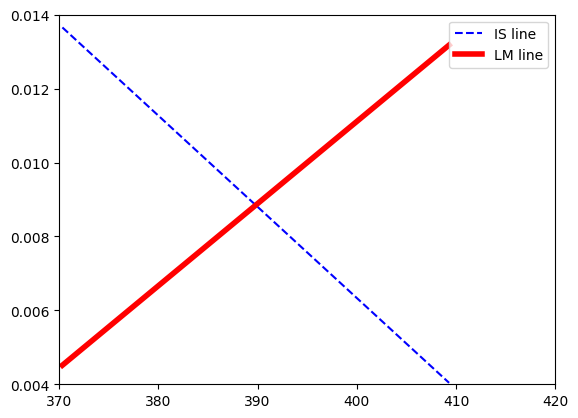

In [3]:
# Plot the solution: IS−LM diagram (r against Y) 
# Generate a grid on Y
Y = np.linspace(0.95*x[0],1.05*x[0], num=100)    
# IS: I=Y−C−G-NX and I=I_bar−br expressed in terms of r
C = C_bar+c*(Y-T_bar) 
NX=x[3]
I =Y-C-G_bar-NX
IS=( I_bar-I ) / b  
# LM: M_bar/P_bar=kY−hr expressed in terms of r
LM = 1/h*( k*Y-M_bar / P_bar )
plt.figure(num=1)
l1 = plt.plot(Y, IS , '--b', label='IS line')
l2 = plt.plot(Y, LM,  color='red', linewidth=4.0, linestyle='-', label='LM line')
plt.xlim((370, 420))
plt.ylim((0.004, 0.014))
plt.legend();

## Fiscal policy: government/public authorities decrease taxes from 150 to 130

Let's consider the effect of a "fiscal shock": an unexpected decrease in taxes, with constant public spending. The new value is T = 130.

In [4]:
T_bar = 130 #new taxes
# x = [Y, C, I, NX, r, Yf, Cf, If, NXf, rf, e] , vector of the endogenous variables 
# d, vector of the exogeneous variables
d = np.array([G_bar,C_bar-c*T_bar,I_bar,M_bar/P_bar,Gf_bar,Cf_bar-cf*Tf_bar,If_bar,Mf_bar/Pf_bar, NX_bar, 0, 0] )
#Compute the solution
xnew=np.linalg.solve(A,d)
print(" IS-LM model: open economy \
      \n-----------------------------------------------------------\
      \nShock: new value for T = 130.00\
      \nExogenous variables: \nG = Gf = 150; Tf = 150; M = Mf = 210; P = Pf = 1     \
      \nEndogenous variables: \
      \nProduction, Y = {0:.2f}，Yf = {5:.2f}; \
      \nConsumption, C = {1:.2f}, Cf = {6:.2f}; \
      \nInvestment, I = {2:.2f}, If = {7:.2f}; \
      \nNet exports, NX = {3:.2f}, NXf = {8:.2f}; \
      \nInterest rate (%), r = {4:.2f}, rf = {9:.2f}; \
      \nExchange rate, e = {10:.2f} ".format(xnew[0],xnew[1],xnew[2],xnew[3],xnew[4]*100,xnew[5],xnew[6],xnew[7],xnew[8],xnew[9]*100,xnew[10] ) )

 IS-LM model: open economy       
-----------------------------------------------------------      
Shock: new value for T = 130.00      
Exogenous variables: 
G = Gf = 150; Tf = 150; M = Mf = 210; P = Pf = 1           
Endogenous variables:       
Production, Y = 398.77，Yf = 398.77;       
Consumption, C = 224.32, Cf = 211.72;       
Investment, I = 30.74, If = 30.74;       
Net exports, NX = -6.30, NXf = 6.30;       
Interest rate (%), r = 1.08, rf = 1.08;       
Exchange rate, e = 0.37 


In [5]:
print(" IS-LM model: open economy \
      \n-----------------------------------------------------------\
      \nChanges in endogenous variables (%):\
      \nProduction, (Ynew-Y)/Y = {0:.4f};\
      \nConsumption, (Cnew-C)/C = {1:.4f}; \
      \nInvestment, (Inew-I)/I = {2:.4f};\
      \nNet exports (avoid [deltaNX/0]!), (NXnew-NX) = {3:.4f};\
      \nExchange rate, (enew-e)/e = {4:.4f};\
      \nInterest rate (p.p.), r = {5:.2f}".format((xnew[0]-x[0])/x[0],(xnew[1]-x[1])/x[1],(xnew[2]-x[2])/x[2],(xnew[3]-x[3]),(xnew[10]-x[10])/x[10],(xnew[4]-x[4])*100 ) )

 IS-LM model: open economy       
-----------------------------------------------------------      
Changes in endogenous variables (%):      
Production, (Ynew-Y)/Y = 0.0230;      
Consumption, (Cnew-C)/C = 0.0885;       
Investment, (Inew-I)/I = -0.0885;      
Net exports (avoid [deltaNX/0]!), (NXnew-NX) = -6.3000;      
Exchange rate, (enew-e)/e = -0.6300;      
Interest rate (p.p.), r = 0.20


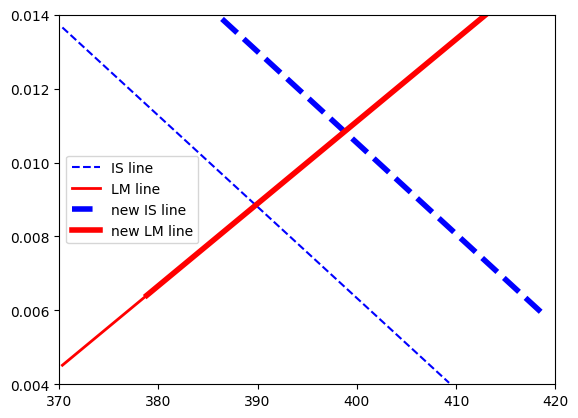

In [6]:
# Plot the solution: IS−LM diagram (r against Y) 
# Generate a grid on Y. 
new_Y = np.linspace(0.95*xnew[0],1.05*xnew[0], num=100) 
# IS: I=Y−C−G-NX and I=I_bar−br expressed in terms of r
new_C = C_bar+c*(new_Y-T_bar) 
new_NX=xnew[3]
new_I =new_Y-new_C-G_bar-new_NX
new_IS=( I_bar-new_I ) / b  
# LM: M_bar/P_bar=kY−hr expressed in terms of r
new_LM = 1/h*( k*new_Y-M_bar / P_bar )
plt.figure(num=2)
l1 = plt.plot(Y, IS , '--b', label='IS line')
l2 = plt.plot(Y, LM,  color='red', linewidth=2.0, linestyle='-', label='LM line')
l1 = plt.plot(new_Y, new_IS , '--b', linewidth=4.0, label='new IS line')
l2 = plt.plot(new_Y, new_LM,  color='red', linewidth=4.0, linestyle='-', label='new LM line')
plt.xlim((370, 420))
plt.ylim((0.004, 0.014))
plt.legend();

## Fiscal policy: government/public authorities increase public spending from 150 to 170

Let's consider the effect of another "fiscal shock": an unexpected increase in public spending, with constant taxes. The new value is G = 170.

In [7]:
G_bar = 170 #New government spending 
T_bar = 150 #Initial taxes
# x = [Y, C, I, NX, r, Yf, Cf, If, NXf, rf, e] , vector of the endogeneous variables 
# d, vector of the exogeneous variables
d = np.array([G_bar,C_bar-c*T_bar,I_bar,M_bar/P_bar,Gf_bar,Cf_bar-cf*Tf_bar,If_bar,Mf_bar/Pf_bar, NX_bar, 0, 0] )
#Compute the solution
xnew=np.linalg.solve(A,d)
print(" IS-LM model: open economy \
      \n-----------------------------------------------------------\
      \nShock: new value for G = 170.00\
      \nExogenous variables: \nGf = 150; T = Tf = 150; M = Mf = 210; P = Pf = 1     \
      \nEndogenous variables: \
      \nProduction, Y = {0:.2f}，Yf = {5:.2f}; \
      \nConsumption, C = {1:.2f}, Cf = {6:.2f}; \
      \nInvestment, I = {2:.2f}, If = {7:.2f}; \
      \nNet exports, NX = {3:.2f}, NXf = {8:.2f}; \
      \nInterest rate (%), r = {4:.2f}, rf = {9:.2f}; \
      \nExchange rate, e = {10:.2f} ".format(xnew[0],xnew[1],xnew[2],xnew[3],xnew[4]*100,xnew[5],xnew[6],xnew[7],xnew[8],xnew[9]*100,xnew[10] ) )

 IS-LM model: open economy       
-----------------------------------------------------------      
Shock: new value for G = 170.00      
Exogenous variables: 
Gf = 150; T = Tf = 150; M = Mf = 210; P = Pf = 1           
Endogenous variables:       
Production, Y = 404.03，Yf = 404.03;       
Consumption, C = 215.04, Cf = 215.04;       
Investment, I = 28.99, If = 28.99;       
Net exports, NX = -10.00, NXf = 10.00;       
Interest rate (%), r = 1.20, rf = 1.20;       
Exchange rate, e = 0.00 


In [8]:
print(" IS-LM model: open economy \
      \n-----------------------------------------------------------\
      \nChanges in endogenous variables (%):\
      \nProduction, (Ynew-Y)/Y = {0:.4f};\
      \nConsumption, (Cnew-C)/C = {1:.4f}; \
      \nInvestment, (Inew-I)/I = {2:.4f};\
      \nNet exports (avoid [deltaNX/0]!), (NXnew-NX) = {3:.4f};\
      \nExchange rate, (enew-e)/e = {4:.4f};\
      \nInterest rate (p.p.), r = {5:.2f}".format((xnew[0]-x[0])/x[0],(xnew[1]-x[1])/x[1],(xnew[2]-x[2])/x[2],(xnew[3]-x[3]),(xnew[10]-x[10])/x[10],(xnew[4]-x[4])*100 ) )

 IS-LM model: open economy       
-----------------------------------------------------------      
Changes in endogenous variables (%):      
Production, (Ynew-Y)/Y = 0.0365;      
Consumption, (Cnew-C)/C = 0.0435;       
Investment, (Inew-I)/I = -0.1405;      
Net exports (avoid [deltaNX/0]!), (NXnew-NX) = -10.0000;      
Exchange rate, (enew-e)/e = -1.0000;      
Interest rate (p.p.), r = 0.32


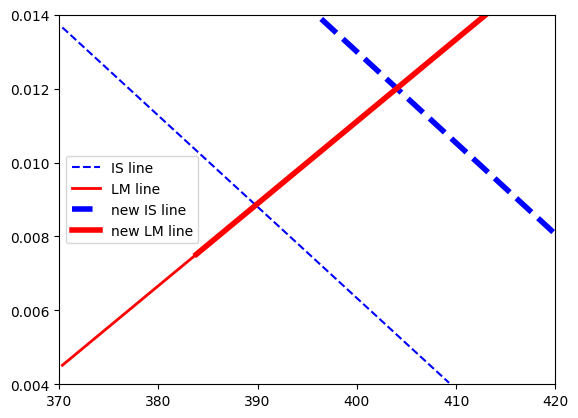

In [9]:
# Plot the solution: IS−LM diagram (r against Y) 
# Generate a grid on Y.
new_Y = np.linspace(0.95*xnew[0],1.05*xnew[0], num=100) 
# IS: I=Y−C−G-NX and I=I_bar−br expressed in terms of r
new_C = C_bar+c*(new_Y-T_bar) 
new_NX=xnew[3]
new_I =new_Y-new_C-G_bar-new_NX
new_IS=( I_bar-new_I ) / b  
# LM: M_bar/P_bar=kY−hr expressed in terms of r
new_LM = 1/h*( k*new_Y-M_bar / P_bar )
plt.figure(num=3)
l1 = plt.plot(Y, IS , '--b', label='IS line')
l2 = plt.plot(Y, LM,  color='red', linewidth=2.0, linestyle='-', label='LM line')
l1 = plt.plot(new_Y, new_IS , '--b', linewidth=4.0, label='new IS line')
l2 = plt.plot(new_Y, new_LM,  color='red', linewidth=4.0, linestyle='-', label='new LM line')
plt.xlim((370, 420))
plt.ylim((0.004, 0.014))
plt.legend();

## Monetary policy: monetary authorities increase the money supply from 210 to 230

Let's now consider the effect of a "monetary shock": an unexpected decrease in the supply of money. The new value is M = 230.

In [10]:
G_bar = 150 #Initial government spending 
T_bar = 150 #Initial taxes
M_bar = 230.00 #New money supply
# x = [Y, C, I, NX, r, Yf, Cf, If, NXf, rf, e] , vector of the endogeneous variables 
# d, vector of the exogeneous variables
d = np.array([G_bar,C_bar-c*T_bar,I_bar,M_bar/P_bar,Gf_bar,Cf_bar-cf*Tf_bar,If_bar,Mf_bar/Pf_bar, NX_bar, 0, 0] )
#Compute the solution
xnew=np.linalg.solve(A,d)
print(" IS-LM model: open economy \
      \n-----------------------------------------------------------\
      \nShock: new value for M = 230.00\
      \nExogenous variables: \nG = Gf = 150; T = Tf = 150; M = 210; P = Pf = 1     \
      \nEndogenous variables: \
      \nProduction, Y = {0:.2f}，Yf = {5:.2f}; \
      \nConsumption, C = {1:.2f}, Cf = {6:.2f}; \
      \nInvestment, I = {2:.2f}, If = {7:.2f}; \
      \nNet exports, NX = {3:.2f}, NXf = {8:.2f}; \
      \nInterest rate (%), r = {4:.2f}, rf = {9:.2f}; \
      \nExchange rate, e = {10:.2f} ".format(xnew[0],xnew[1],xnew[2],xnew[3],xnew[4]*100,xnew[5],xnew[6],xnew[7],xnew[8],xnew[9]*100,xnew[10] ) )

 IS-LM model: open economy       
-----------------------------------------------------------      
Shock: new value for M = 230.00      
Exogenous variables: 
G = Gf = 150; T = Tf = 150; M = 210; P = Pf = 1           
Endogenous variables:       
Production, Y = 414.38，Yf = 381.04;       
Consumption, C = 221.56, Cf = 200.56;       
Investment, I = 36.65, If = 36.65;       
Net exports, NX = 6.17, NXf = -6.17;       
Interest rate (%), r = 0.69, rf = 0.69;       
Exchange rate, e = 1.95 


In [11]:
print(" IS-LM model: open economy \
      \n-----------------------------------------------------------\
      \nChanges in endogenous variables (%):\
      \nProduction, (Ynew-Y)/Y = {0:.4f};\
      \nConsumption, (Cnew-C)/C = {1:.4f}; \
      \nInvestment, (Inew-I)/I = {2:.4f};\
      \nNet exports (avoid [deltaNX/0]!), (NXnew-NX) = {3:.4f};\
      \nExchange rate, (enew-e)/e = {4:.4f};\
      \nInterest rate (p.p.), r = {5:.2f}".format((xnew[0]-x[0])/x[0],(xnew[1]-x[1])/x[1],(xnew[2]-x[2])/x[2],(xnew[3]-x[3]),(xnew[10]-x[10])/x[10],(xnew[4]-x[4])*100 ) )

 IS-LM model: open economy       
-----------------------------------------------------------      
Changes in endogenous variables (%):      
Production, (Ynew-Y)/Y = 0.0630;      
Consumption, (Cnew-C)/C = 0.0751;       
Investment, (Inew-I)/I = 0.0866;      
Net exports (avoid [deltaNX/0]!), (NXnew-NX) = 6.1667;      
Exchange rate, (enew-e)/e = 0.9500;      
Interest rate (p.p.), r = -0.19


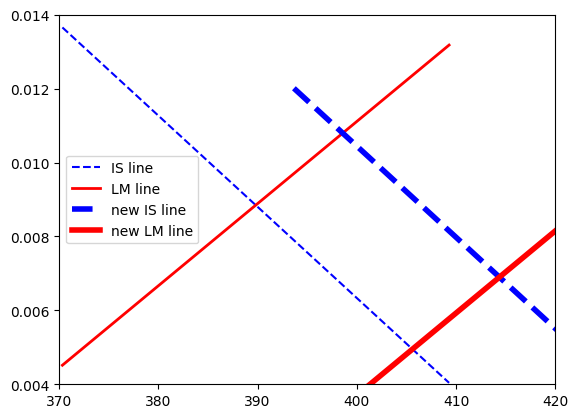

In [12]:
# Plot the solution: IS−LM diagram (r against Y) 
# Generate a grid on Y.
new_Y = np.linspace(0.95*xnew[0],1.05*xnew[0], num=100) 
# IS: I=Y−C−G-NX and I=I_bar−br expressed in terms of r
new_C = C_bar+c*(new_Y-T_bar) 
new_NX=xnew[3]
new_I =new_Y-new_C-G_bar-new_NX
new_IS=( I_bar-new_I ) / b  
# LM: M_bar/P_bar=kY−hr expressed in terms of r
new_LM = 1/h*( k*new_Y-M_bar / P_bar )
plt.figure(num=4)
l1 = plt.plot(Y, IS , '--b', label='IS line')
l2 = plt.plot(Y, LM,  color='red', linewidth=2.0, linestyle='-', label='LM line')
l1 = plt.plot(new_Y, new_IS , '--b', linewidth=4.0, label='new IS line')
l2 = plt.plot(new_Y, new_LM,  color='red', linewidth=4.0, linestyle='-', label='new LM line')
plt.xlim((370, 420))
plt.ylim((0.004, 0.014))
plt.legend();